# Logistic Regression Implimentation from Scratch

### About

 **Description :**
        Bulding a Logistic Regression model from scratch in python, that predicts which passengers survived the Titanic ship wreck. Objective is learning how to code from scratch, notebook is not a kaggle competition perspective. 

**Problem Statement :** https://www.kaggle.com/c/titanic/

**Logistic Regeression:** https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf
    
**Author :**
    M Ravi Kumar, Data Scientist | IIT Hyderabad R&D
    
**Date:**
    04-02-2022

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder # to Encode catagorical featues
from sklearn.model_selection import StratifiedKFold #Cross validation
from sklearn.model_selection import train_test_split


### 1. Loading  Train dataset
Loading dataset into pandas dataframe

In [2]:
# Loading training and testing datasets

df_train = pd.read_csv('train.csv')
print("No of Records in Train Dataset:",df_train.shape[0])
df_train.head()

No of Records in Train Dataset: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Datatypes & Missing Values of columns

'''
print("Column \t\t Datatype \t\t NanValues")

for col in df_train.columns:
    print(col+"\t\t"+ df_train.col.dtype+"\t\t"+df_train.col.isnull().sum() )
'''

print("********* Column datatypes **********\n\n",df_train.dtypes)

# Nof o Missing Rows
print("\n *********** No of missung values ********\n\n", df_train.isnull().sum())



********* Column datatypes **********

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 *********** No of missung values ********

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Seperating features and label, Removed unnecessary features

X = df_train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df_train[['Survived']]
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


### 2. Study & Cleaning of features

Studying the each column anf Handling null and catagorical data.


In [5]:
# Column vs Frequency of Labels

def compute_column_class_freq(column_name):
    
    uniq_col_vals = list(df_train[column_name].unique())
    
    col_cls_0_frq = [] # Class 0 Frequency
    col_cls_1_frq = [] # Class 1 Frequency
    for val in uniq_col_vals:
        col_cls_0_frq.append(df_train[(df_train[column_name] == val) & (df_train['Survived'] == 0)].shape[0])
        col_cls_1_frq.append(df_train[(df_train[column_name] == val) & (df_train['Survived'] == 1)].shape[0])
        
    return uniq_col_vals,col_cls_0_frq,col_cls_1_frq

In [6]:
#Plotting graph of Column vs Class Frequency
def plot_column_class_freq(Column,col_vals,cls_0_frq,cls_1_frq):

    r = np.arange(len(col_vals))
    width = 0.25
    

    plt.bar(r, cls_0_frq, color = 'r',
            width = width,
            label='Class 0')
    plt.bar(r + width, cls_1_frq, color = 'g',
            width = width,
            label='Class 1')


    plt.xlabel(Column)
    plt.ylabel("Number of people Surived or not")
    plt.title("Number of people Surived or not in "+Column)

    # plt.grid(linestyle='--')
    plt.xticks(r + width/2,col_vals)
    plt.legend()

    plt.show()
    

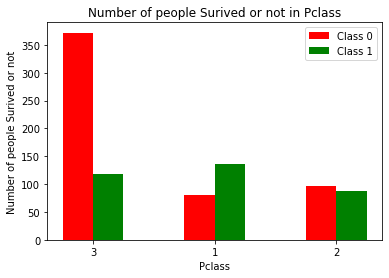

In [7]:
# Pclass column

col = 'Pclass'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

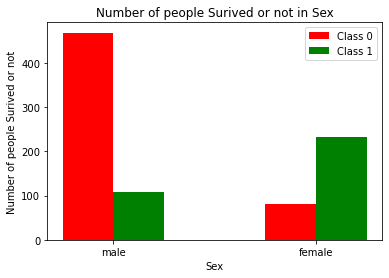

Data Frame after sex column encoding


/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/3419042248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S


In [8]:
# Sex column

#Ploting graph

col = 'Sex'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

#Encoding catgorical data
print("Data Frame after sex column encoding")
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


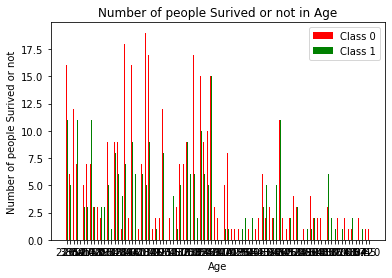

In [9]:
# Age column

#Updating null values with averege values

X['Age'].fillna(value=round(X['Age'].mean()), inplace=True)

#Plotting graph
col = 'Age'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

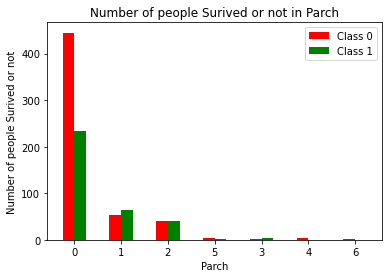

In [10]:
# Parch column

#Ploting graph

col = 'Parch'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

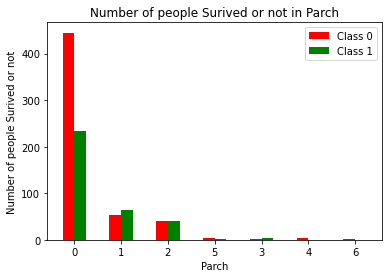

In [11]:
# Parch column

#Ploting graph

col = 'Parch'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

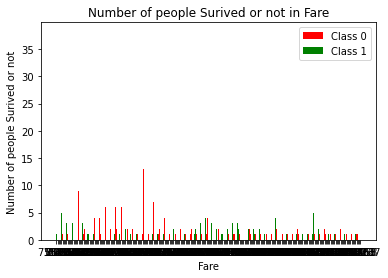

In [12]:
# Fare column

#Ploting graph

col = 'Fare'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

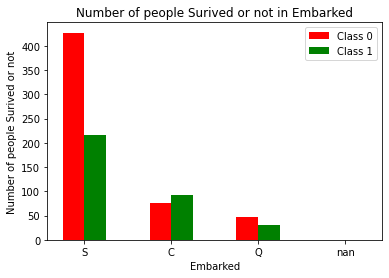

Data Frame after Embarked column encoding


/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/3132899251.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = le.fit_transform(X['Embarked'])
/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/3132899251.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked']+1  # Avoiding 0 value enconding


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,3
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,3
3,4,1,0,35.0,1,0,53.1000,3
4,5,3,1,35.0,0,0,8.0500,3


In [13]:
# Embarked

# Replacing null by most occuring value

X["Embarked"].value_counts()
X['Embarked'].fillna(value=X['Embarked'].mode(), inplace=True)

# Plotting Graph
col = 'Embarked'
uniq_col_vals,col_cls_0_frq,col_cls_1_frq = compute_column_class_freq(col)
plot_column_class_freq(col,uniq_col_vals,col_cls_0_frq,col_cls_1_frq)

#Encoding catgorical data
print("Data Frame after Embarked column encoding")
le = LabelEncoder()
X['Embarked'] = le.fit_transform(X['Embarked'])
X['Embarked'] = X['Embarked']+1  # Avoiding 0 value enconding
X.head()


### 3. Building Logistic Regression Model
Logistic Regression implimentation done according into cost function and gradient descent from below material.
https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf

In [14]:
import math

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [15]:
class LogisticRegression:
    
    def __init__(self,data,labels,lr,iterations):
        
        # Data
        self.data = data
        # Labels
        self.labels = labels
        # No of Samples
        self.n = data.shape[0]
        # No of Features
        self.d = data.shape[1]
        
        # Theta Learning parameters
        self.Theta = np.zeros(self.d)
        # Learningrate
        self.aplha = lr
        # iterations
        self.iterations = iterations
        
    def fit(self):
        
        # Iterations of gradient descent for convergence
        for iteration in range(self.iterations):
            #print("\n Iteration : ", iteration)
            # Iierating all training sample
            for i in range(self.n):
                pred = self.predict(self.data[i])
                error = self.labels[i]-self.predict(self.data[i])
                #Updating all Theta's
                for j in range(len(self.Theta)):
                    self.Theta[j] += self.aplha*error*self.data[i][j]
        print("Model Training Done")
    
    '''
    Function predict() takes only one sample as input return the prediction for that sample.
    For multiple samples you need to call predict() in loop.
    '''
    def predict(self,x):
        return round(sigmoid(np.dot(self.Theta.T,x)))
    
    def get_accuracy(self,X,y):
        correct_pred = 0
        for i in range(X.shape[0]):
            if self.predict(X[i]) == y[i]:
                correct_pred += 1
        return correct_pred/float(len(y))*100

### 4. Running Model
Setting hyper parameters and running the model

In [16]:
#Spliting Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

'''
Adding 1's in First column of features data X
So that W.X+b will be W.X where x_0 is 1.
'''
X_train['PassengerId'] = 1
X_test['PassengerId'] = 1

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

learning_rate = 0.01
iterations = 1000
#Creating Model object & Training Data
model =  LogisticRegression(X_train,y_train,learning_rate,iterations)
model.fit()

#Scores
print("Training Accuracy: ", model.get_accuracy(X_train,y_train))
print("Testing Accuracy: ", model.get_accuracy(X_test,y_test))


/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/2228722746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PassengerId'] = 1
/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/2228722746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['PassengerId'] = 1


Model Training Done
Training Accuracy:  76.00671140939598
Testing Accuracy:  70.50847457627118


### 5. Prediction on Actual Test data
Predictions on test data provided by Kaggal without acutal labels for competition 

In [17]:
# Loading test data
df_test = pd.read_csv('test.csv')
print("No of Records in test Dataset:",df_train.shape[0])
df_test.head()

No of Records in test Dataset: 891


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
print("********* Column datatypes **********\n\n",df_train.dtypes)

# Nof o Missing Rows
print("\n *********** No of missung values ********\n\n", df_train.isnull().sum())


********* Column datatypes **********

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 *********** No of missung values ********

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
X_act_test =  df_test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

# Fill Missing Values
X_act_test['Age'].fillna(value = round(X_act_test['Age'].mean()),inplace = True)
X_act_test['Fare'].fillna(value = X_act_test['Fare'].mean(),inplace = True)


# Catagorical Data Encoding

X_act_test['Sex'] = le.fit_transform(X_act_test['Sex'])
X_act_test['Embarked'] = le.fit_transform(X_act_test['Embarked'])
X_act_test['Embarked'] = X_act_test['Embarked']+1  # Avoiding 0 value enconding
X_act_test.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/2271214232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_act_test['Sex'] = le.fit_transform(X_act_test['Sex'])
/var/folders/lr/xky6njz17jx8ftrg6_lk6krr0000gn/T/ipykernel_8995/2271214232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3


In [20]:
# Actual Test Data Predictions

sub_df = pd.DataFrame(columns = ["PassengerId","Survived"])

for i in range(X_act_test.shape[0]) :
    x = X_act_test.to_numpy()[i]
    x[0] = 1
    pred = model.predict(x)
    sub_df = sub_df.append({"PassengerId":X_act_test.PassengerId.iloc[i],"Survived":pred},ignore_index = True)
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
# Writing data to csv file
sub_df.to_csv('submission.csv', index=False)